# On-the-fly high-resolution foregrounds simulations at scale with TOAST and PySM

* **Andrea Zonca** - San Diego Supercomputer Center
* Ted Kisner, Reijo Keskitalo, Julian Borrill - Lawrence Berkeley Labs

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
%matplotlib inline

In [1]:
!cat create_focalplane.slurm

#!/bin/bash

#SBATCH --partition=debug

#SBATCH --account=mp107
#SBATCH --nodes=1
#SBATCH --constraint=knl,quad,cache
#SBATCH --time=00:10:00
#SBATCH --job-name=pico-focalplane
#SBATCH --output=pico-focalplane-%j.log

set -o errexit
set -v

srun -n 1 -N 1 toast_fake_focalplane.py --minpix 50 --out fpfg2018 \
    --fwhm 9.5 --fwhm_sigma 0.03 \
    --fov 12.15 \
    --psd_fknee 0.010 --psd_NET 33.8e-6 --psd_fmin 1.0e-5 \
    --bandcenter_ghz 89.6 --bandcenter_sigma 0.01 \
    --bandwidth_ghz 22.4 --bandwidth_sigma 0.02 \
    --random_seed 11111


In [20]:
fp = pickle.load(open("fpfg2018_61.pkl", "rb"))

In [21]:
fp['fake_00A']

{'NET': 0.0,
 'alpha': 1.0,
 'bandcenter_ghz': 90.71265546906,
 'bandwidth_ghz': 21.63712115890996,
 'fknee': 0.0,
 'fmin': 1e-05,
 'fwhm': 9.5,
 'fwhm_deg': 0.15796663017698565,
 'index': 0,
 'quat': array([0., 0., 0., 1.])}

In [22]:
p = ["fwhm_deg", "bandcenter_ghz", "bandwidth_ghz"]
a = pd.DataFrame({k : np.array([each[k] for each in fp.values()]) for k in p})

In [23]:
a["fwhm_arcmin"] = a["fwhm_deg"] * 60

In [25]:
a = a.reset_index()

In [26]:
a.head()

,index,bandcenter_ghz,bandwidth_ghz,fwhm_deg,fwhm_arcmin
0,0,90.712655,21.637121,0.157967,9.477998
1,1,89.167995,21.828558,0.158181,9.490877
2,2,88.534447,22.968047,0.164654,9.879223
3,3,90.575148,22.402305,0.155915,9.354927
4,4,89.265496,22.976564,0.161122,9.667323


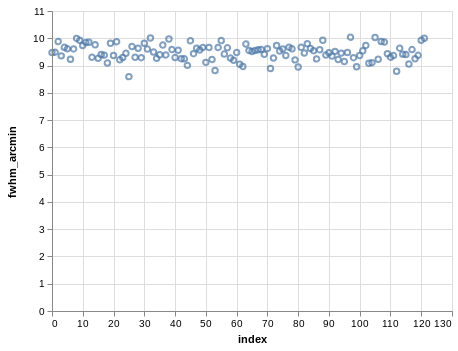

In [27]:
import altair as alt
from vega_datasets import data

alt.Chart(a).mark_point().encode(x="index", y="fwhm_arcmin")

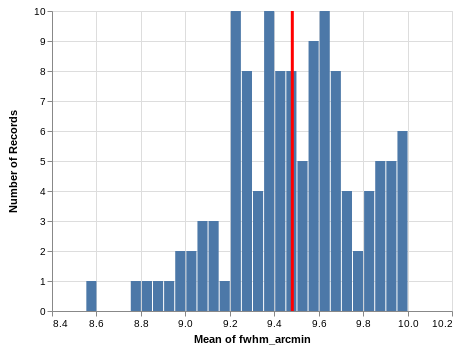

In [28]:
bar = alt.Chart(a).mark_bar().encode(x=alt.X("fwhm_arcmin:Q", bin=alt.Bin(maxbins=50), axis=None),
    y='count()')

rule = alt.Chart(a).mark_rule(color='red').encode(
    x='mean(fwhm_arcmin):Q',
    size=alt.value(3)
)

bar + rule

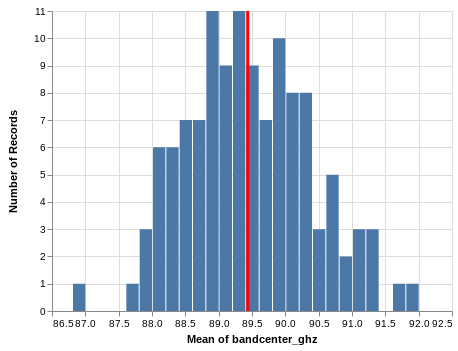

In [29]:
bar = alt.Chart(a).mark_bar().encode(x=alt.X("bandcenter_ghz:Q", bin=alt.Bin(maxbins=50), axis=None),
    y='count()')

rule = alt.Chart(a).mark_rule(color='red').encode(
    x='mean(bandcenter_ghz):Q',
    size=alt.value(3)
)

bar + rule

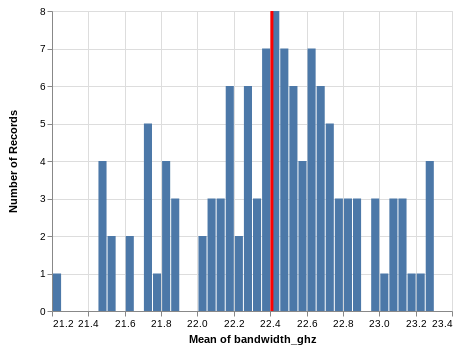

In [30]:
bar = alt.Chart(a).mark_bar().encode(x=alt.X("bandwidth_ghz:Q", bin=alt.Bin(maxbins=50), axis=None),
    y='count()')

rule = alt.Chart(a).mark_rule(color='red').encode(
    x='mean(bandwidth_ghz):Q',
    size=alt.value(3)
)

bar + rule

In [31]:
a["fwhm_arcmin"].mean()

9.481434602489822

In [32]:
a["fwhm_arcmin"].std() / a["fwhm_arcmin"].mean()

0.03078016508797121